In [37]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from wordcloud import WordCloud
import pyLDAvis, pyLDAvis.sklearn
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation, PCA
pyLDAvis.enable_notebook()
style.use('fivethirtyeight')
import re
import seaborn as sns

In [2]:
df = pd.read_csv('data/tika_transcript_clean.csv', index_col=0)
df.head()

,title,date,text,clean_text
0,Talk to the People of President Rodrigo Roa Du...,2020-05-04,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,president duterte reduced changed way life eve...
1,Talk to the People of President Rodrigo Roa Du...,2020-04-27,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,dost secretary fortunato dela pea susunod kahi...
2,Talk to the People of President Rodrigo Roa Du...,2020-04-24,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,presidential spokesperson harry roque magandan...
3,Talk to the People of President Rodrigo Roa Du...,2020-04-16,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,mga kapatid kong pilipino nandito harap ninyo ...
4,Intervention of President Rodrigo Roa Duterte ...,2020-04-14,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,thank mr chair majesty excellencies welcome le...


# Plotting Speech Frequency

In [3]:
df = df.sort_values('date').reset_index().drop('index', axis=1)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['date_diff'] = df['date'].diff().dt.days

df.head(8)

,title,date,text,clean_text,date_diff
0,Speech of President Rodrigo Roa Duterte during...,2018-03-18,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,kindly sit thank courtesy troop commander coul...,NaN
1,Speech of President Rodrigo Roa Duterte during...,2018-03-20,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,kindly sit salamat ho kortesiya ninyo troop co...,2.0
2,Speech of President Rodrigo Roa Duterte during...,2018-03-20,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,kindly sit thank courtesy ladies gentlemen usu...,0.0
3,Speech of President Rodrigo Roa Duterte during...,2018-03-21,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,kindly sit thank courtesy troop commander coul...,1.0
4,Speech of President Rodrigo Roa Duterte during...,2018-03-21,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,duterte duterte hinanap kayo noong election ni...,0.0
5,Speech of President Rodrigo Roa Duterte during...,2018-03-23,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,salamat panglingkod mo kanang una tanan kinaha...,2.0
6,Speech Of President Rodrigo Roa Duterte during...,2018-03-26,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,thank courtesy kindly sit prepared speech two ...,3.0
7,Speech of President Rodrigo Roa Duterte during...,2018-04-02,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,kindly sit salamat courtesy ninyo [bakit dumid...,7.0


In [4]:
df.tail()

,title,date,text,clean_text,date_diff
414,Intervention of President Rodrigo Roa Duterte ...,2020-04-14,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,thank mr chair majesty excellencies welcome le...,0.0
415,Talk to the People of President Rodrigo Roa Du...,2020-04-16,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,mga kapatid kong pilipino nandito harap ninyo ...,2.0
416,Talk to the People of President Rodrigo Roa Du...,2020-04-24,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,presidential spokesperson harry roque magandan...,8.0
417,Talk to the People of President Rodrigo Roa Du...,2020-04-27,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,dost secretary fortunato dela pea susunod kahi...,3.0
418,Talk to the People of President Rodrigo Roa Du...,2020-05-04,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,president duterte reduced changed way life eve...,7.0


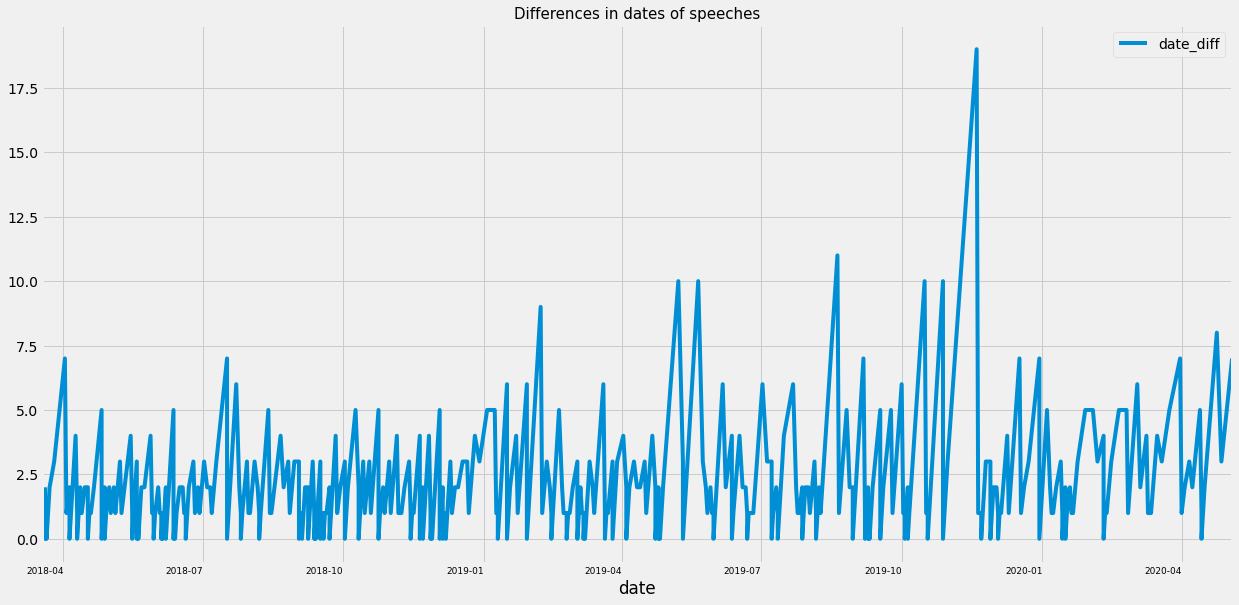

In [5]:
ax = df.plot(
    x='date', 
    y='date_diff', 
    rot=0,
    figsize=(19,11)
).set_title("Differences in dates of speeches", fontsize=15)
plt.xticks(fontsize=9)
plt.show()

# N-gram and TF-IDF

In [6]:
def texts_to_ngram(text, n=2):
    vectorizer = CountVectorizer(
        ngram_range=(n, n),
        token_pattern=r'\b\w+\b',
        min_df=1,
        max_features=2000)
    dtm = vectorizer.fit_transform(text)
    #pickle.dump(vectorizer, open('out/ngram.pk', 'wb'))
    return dtm, vectorizer

def texts_to_tfidf(text):
    vectorizer = TfidfVectorizer(max_features=2000)
    tfidf = vectorizer.fit_transform(text)
    #pickle.dump(vectorizer, open('out/tfidf.pk', 'wb'))
    return tfidf, vectorizer

In [327]:
# Get ngram matrix
ngram, ngram_v = texts_to_ngram(df['clean_text'], n=3)
print('Ngram matrix shape:', ngram.toarray().shape)
list(ngram_v.vocabulary_.items())[0:10]

Ngram matrix shape: (419, 2000)


[('kindly sit thank', 766),
 ('sit thank courtesy', 1637),
 ('give tikas pahinga', 387),
 ('vice president maria', 1789),
 ('president maria leonor', 1406),
 ('national defense secretary', 1156),
 ('defense secretary delfin', 216),
 ('secretary delfin lorenzana', 1567),
 ('delfin lorenzana members', 221),
 ('lorenzana members cabinet', 905)]

In [335]:
# Modify original text to cut out first part and to remove line breaks
def modify_data(text):
    if not isinstance(text, float):
        index_of_date = text.find(']')
        text = text[index_of_date+1:]
        text = ' '.join(text.split())
    
    return text

df['modified_text'] = df['text'].apply(modify_data)
df.head()

,title,date,text,clean_text,date_diff,swear_words_num,swear_words,modified_text
0,Speech of President Rodrigo Roa Duterte during...,2018-03-18,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,kindly sit thank courtesy troop commander coul...,NaN,5,"[g***, b***, b***, g***, t**** i**]",Kindly sit down. Thank you for your courtesy. ...
1,Speech of President Rodrigo Roa Duterte during...,2018-03-20,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,kindly sit salamat ho kortesiya ninyo troop co...,2.0,0,[],Kindly sit down and salamat ho sa kortesiya ni...
2,Speech of President Rodrigo Roa Duterte during...,2018-03-20,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,kindly sit thank courtesy ladies gentlemen usu...,0.0,51,"[p***** i**, p****** i****, t***, l****, g***,...","Kindly sit down. Thank you for your courtesy, ..."
3,Speech of President Rodrigo Roa Duterte during...,2018-03-21,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,kindly sit thank courtesy troop commander coul...,1.0,17,"[g***, g***, b****, p***** i**, l****, p***** ...",Kindly sit down. Thank you for your courtesy. ...
4,Speech of President Rodrigo Roa Duterte during...,2018-03-21,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,duterte duterte hinanap kayo noong election ni...,0.0,82,"[l****, l*****, g***, p**** i***, p***** i**, ...","Duterte, Duterte, hinanap ko kayo noong electi..."


In [8]:
# Get TFIDF matrix
tfidf, tfidf_v = texts_to_tfidf(df['clean_text'])
print('TFIDF matrix shape:', tfidf.toarray().shape)
list(tfidf_v.vocabulary_.items())[0:10]

TFIDF matrix shape: (419, 2000)


[('kindly', 899),
 ('sit', 1673),
 ('thank', 1806),
 ('courtesy', 368),
 ('commander', 329),
 ('could', 361),
 ('give', 640),
 ('order', 1315),
 ('vice', 1923),
 ('president', 1448)]

# Term Frequencies

In [9]:
def vector_to_frequency(vector, vectorizer):
    """
    Return a list of words and their corresponding occurence in the corpus
    """
    total = vector.sum(axis=0)
    frequency = [(w, total[0, i]) for w, i in vectorizer.vocabulary_.items()]
    frequency = pd.DataFrame(frequency, columns=['term', 'frequency'])
    frequency = frequency.sort_values(by='frequency', ascending=False).reset_index(drop=True)
    return frequency

In [332]:
freq_ngram = vector_to_frequency(ngram, ngram_v)
freq_ngram.head()

,term,frequency
0,mga p i,270
1,p i mo,219
2,sir president duterte,204
3,p i ka,175
4,p i yan,136


In [334]:
freq_tfidf = vector_to_frequency(tfidf, tfidf_v)
freq_tfidf.head()

,term,frequency
0,yan,61.588303
1,mga,60.735861
2,mo,57.413046
3,hindi,47.479250
4,eh,35.609758


# Plotting Frequencies

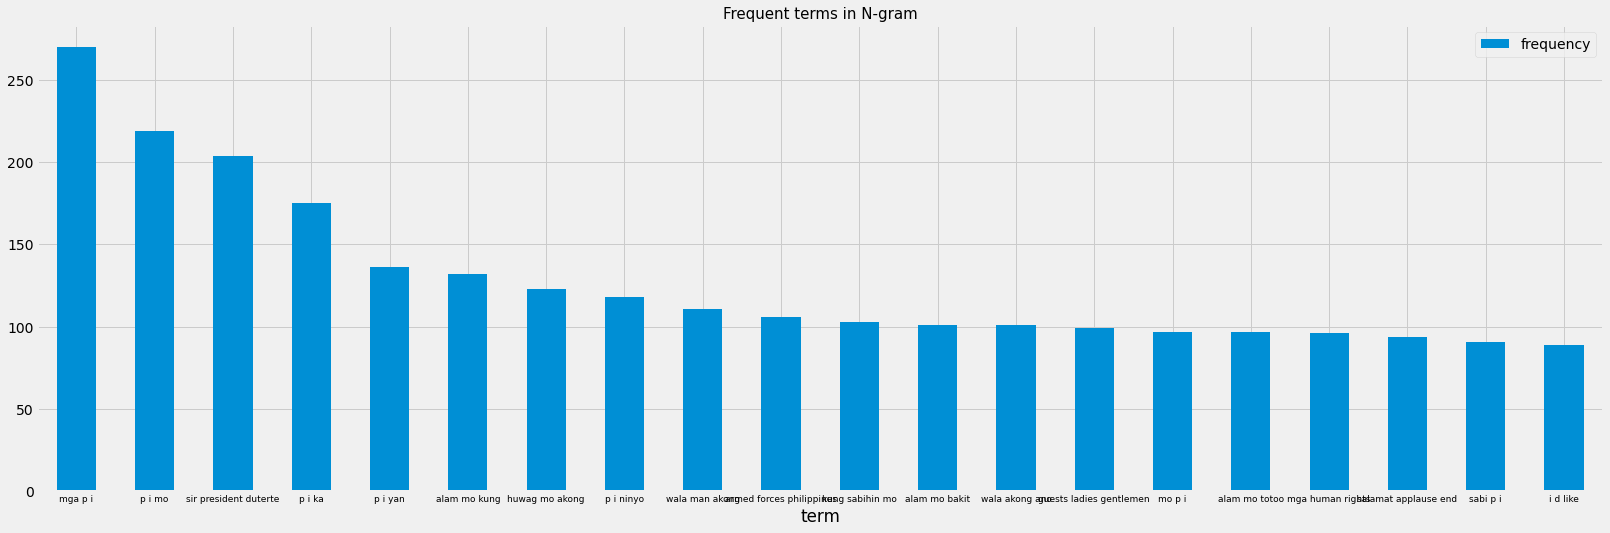

In [16]:
ax = freq_ngram.head(20).plot.bar(
    x='term', 
    y='frequency', 
    rot=0,
    figsize=(25,8)
).set_title("Frequent terms in N-gram", fontsize=15)
plt.xticks(fontsize=9)
plt.show()

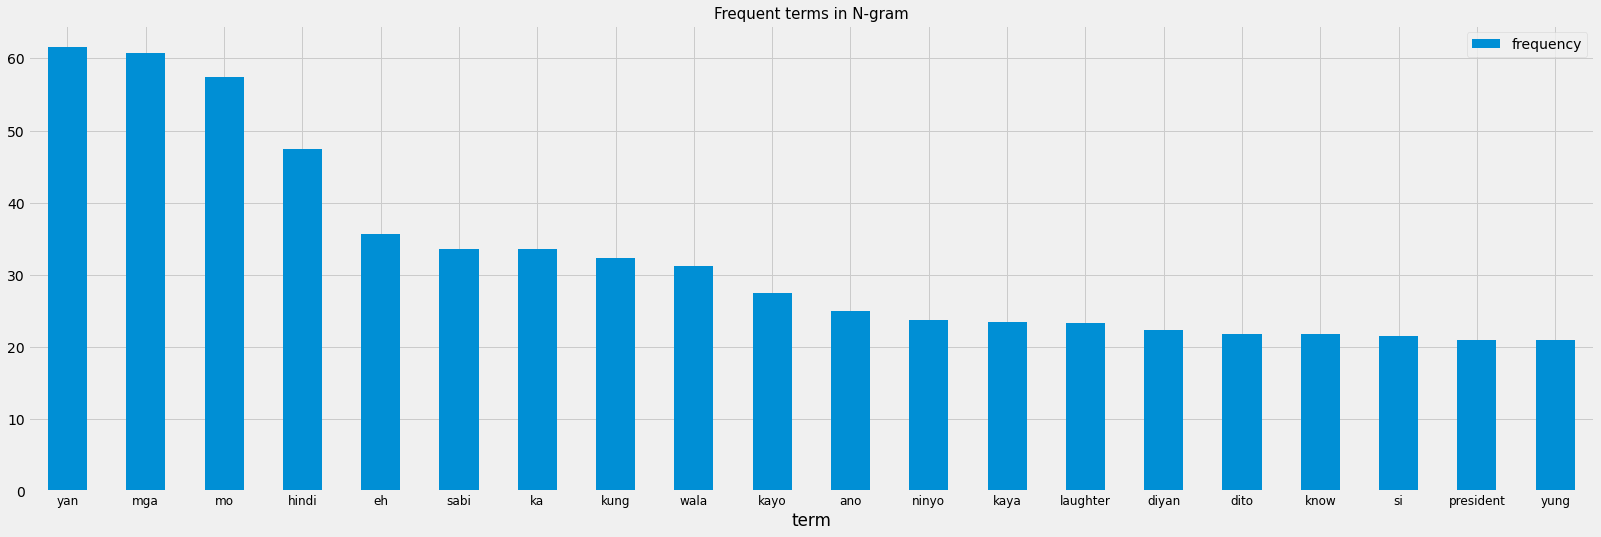

In [22]:
ax2 = freq_tfidf.head(20).plot.bar(
    x='term', 
    y='frequency', 
    rot=0,
    figsize=(25,8)
).set_title("Frequent terms in N-gram", fontsize=15)
plt.xticks(fontsize=12)
plt.show()

In [81]:
# Link: https://github.com/daniddelrio/Philippine-Contraception-Discourse/blob/master/05_text_analysis_comments.ipynb

# Swear Words per Speech

In [84]:
swear_words_pattern = r'([a-z]\*{2,} [a-z]\*{2,}|[a-z]\*{2,})'
df['swear_words_num'] = df['clean_text'].apply(lambda x : len(re.findall(swear_words_pattern, x)))
df.head()

,title,date,text,clean_text,date_diff,swear_words_num,swear_words
0,Speech of President Rodrigo Roa Duterte during...,2018-03-18,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,kindly sit thank courtesy troop commander coul...,NaN,5,"[g***, b***, b***, g***, t**** i**]"
1,Speech of President Rodrigo Roa Duterte during...,2018-03-20,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,kindly sit salamat ho kortesiya ninyo troop co...,2.0,0,[]
2,Speech of President Rodrigo Roa Duterte during...,2018-03-20,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,kindly sit thank courtesy ladies gentlemen usu...,0.0,51,"[p***** i**, p****** i****, t***, l****, g***,..."
3,Speech of President Rodrigo Roa Duterte during...,2018-03-21,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,kindly sit thank courtesy troop commander coul...,1.0,17,"[g***, g***, b****, p***** i**, l****, p***** ..."
4,Speech of President Rodrigo Roa Duterte during...,2018-03-21,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,duterte duterte hinanap kayo noong election ni...,0.0,82,"[l****, l*****, g***, p**** i***, p***** i**, ..."


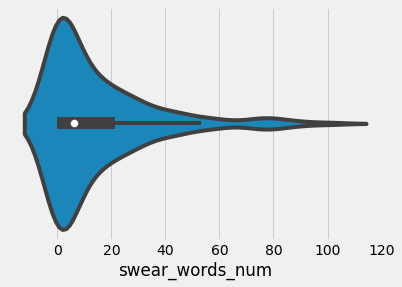

In [52]:
sns.violinplot(data=df, x='swear_words_num')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b9a2510>]],
      dtype=object)

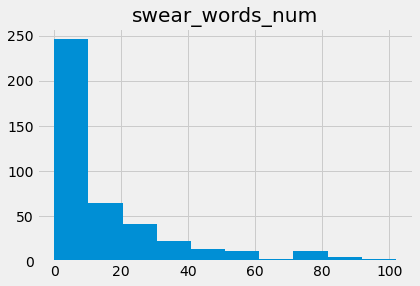

In [58]:
df.hist(column='swear_words_num', bins=10)

In [79]:
df['swear_words'] = df['clean_text'].apply(lambda x : re.findall(swear_words_pattern, x))
swear_words_freq = {}
for i in range(df.shape[0]):
    for word in df.loc[i, 'swear_words']:
        if word not in swear_words_freq:
            swear_words_freq[word] = 1
        else:
            swear_words_freq[word] += 1

swear_words_freq = {k: v for k, v in sorted(swear_words_freq.items(), 
                                            key=lambda item: item[1],
                                            reverse=True)[:10]}
swear_words_freq

{'p***** i**': 1710,
 'y***': 406,
 'g***': 388,
 't*** i**': 386,
 'p***': 339,
 'p***** i****': 334,
 'l****': 212,
 'p****** i**': 186,
 'b****': 182,
 's***': 170}

# Proper Nouns

In [316]:
# proper_nouns_pattern = r'[A-za-z] [A-Z]\w+'
proper_nouns_pattern = r'(([A-Z]\w+( [A-Z]\w+)+)|[A-Za-z] [A-Z]\w+(?:-\w+)*)'
# proper_nouns_pattern_2 = r'[A-Za-z]+-[A-Z][A-Za-z]+'
pattern = r'[A-Za-z]+-*[A-za-z]+'

sample = df.loc[0, 'text']
index_of_date = sample.find(']')
sample = sample[index_of_date+1:]
re.findall(proper_nouns_pattern, sample)[:10]

[('Vice President Maria Leonor Robredo',
  'Vice President Maria Leonor Robredo',
  ' Robredo'),
 ('e National', '', ''),
 ('Defense Secretary Delfin Lorenzana',
  'Defense Secretary Delfin Lorenzana',
  ' Lorenzana'),
 ('e Cabinet', '', ''),
 ('AFP Chief', 'AFP Chief', ' Chief'),
 ('f Staff', '', ''),
 ('General Rey Leonardo Guerrero',
  'General Rey Leonardo Guerrero',
  ' Guerrero'),
 ('e Philippine', '', ''),
 ('Military Academy', 'Military Academy', ' Academy'),
 ('PMA Superintendent', 'PMA Superintendent', ' Superintendent')]

In [323]:
proper_nouns_freq = {}
for i in range(df.shape[0]):
    text = df.loc[i, 'text']
    index_of_date = text.find(']')
    text = text[index_of_date+1:]
    proper_nouns = re.findall(proper_nouns_pattern, text)
    proper_nouns = [x[0][2:] if x[0][1] == ' ' else x[0] for x in proper_nouns]
    for word in proper_nouns:
        if word not in proper_nouns_freq:
            proper_nouns_freq[word] = 1
        else:
            proper_nouns_freq[word] += 1

proper_nouns_freq = {k: v for k, v in sorted(proper_nouns_freq.items(), 
                                            key=lambda item: item[1],
                                            reverse=True)[:30]}
proper_nouns_freq

{'Davao': 1724,
 'PRESIDENT DUTERTE': 1320,
 'Philippines': 1224,
 'Mindanao': 814,
 'President': 756,
 'God': 736,
 'Cabinet': 675,
 'Pilipino': 674,
 'Filipino': 662,
 'China': 654,
 'NPA': 493,
 'Bong': 468,
 'Pilipinas': 446,
 'Secretary': 439,
 'Filipinos': 411,
 'Duterte': 381,
 'Congress': 368,
 'Moro': 356,
 'Inday': 322,
 'Manila': 318,
 'Bisaya': 317,
 'America': 310,
 'Philippine': 304,
 'Bato': 301,
 'Presidente': 299,
 'Diyos': 294,
 'General': 290,
 'Boracay': 288,
 'Cebu': 279,
 'Chinese': 276}

# PyLDAVis

In [339]:
pyLDAvis.save_html(data=df['clean_text'],fileobj='pyldavis.html')

# WordCloud

In [343]:
WordCloud()

TypeError: __init__() got an unexpected keyword argument 'words'